In [1]:
import numpy as np
import matplotlib.pyplot as plt

from particle import Particle
from algorithms import BarnesHut, FMM, PairWise
from forces import Inverse
from universe import Universe
np.random.seed(0)

In [50]:
N = 100
G = 1
DT = 0.01
MAX_LEVEL = int(np.log(N) / np.log(4))
PRECISION = 4
THETA=0.5
TIME_STEPS = 100

In [8]:
force = Inverse(G)
init_particles = [Particle(charge=1/np.sqrt(N)) for _ in range(N)]


In [9]:
particles = [particle.copy() for particle in init_particles]
PW_algorithm = PairWise(force)
PW_universe = Universe(particles, PW_algorithm, DT)

PW_momentums = []
times = []
for _ in range(TIME_STEPS):
    PW_momentums.append(abs(PW_universe.calculate_momentum()))
    times.append(PW_universe.T)

    PW_universe.update()


In [47]:
particles = [particle.copy() for particle in init_particles]
BH_algorithm = BarnesHut(force, theta=THETA)
BH_universe = Universe(particles, BH_algorithm, DT)

BH_momentums = []
for _ in range(TIME_STEPS):
    BH_momentums.append(abs(BH_universe.calculate_momentum()))

    BH_universe.update()

In [51]:
particles = [particle.copy() for particle in init_particles]
FMM_algorithm = FMM(MAX_LEVEL, PRECISION, G)
FMM_universe = Universe(particles, FMM_algorithm, DT)

FMM_momentums = []
for _ in range(TIME_STEPS):
    FMM_momentums.append(abs(FMM_universe.calculate_momentum()))

    FMM_universe.update()

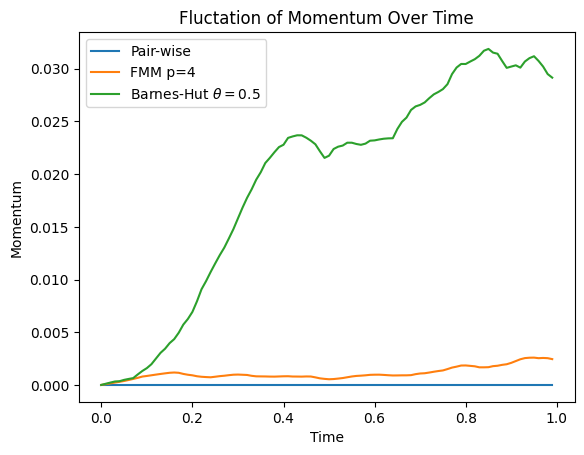

In [52]:
plt.plot(times, PW_momentums, label="Pair-wise")
plt.plot(times, FMM_momentums, label=f"FMM p={PRECISION}")
plt.plot(times, BH_momentums, label=rf"Barnes-Hut $\theta={THETA}$")
plt.xlabel("Time")
plt.ylabel("Total Momentum")
plt.title("Fluctation of Momentum Over Time")
plt.legend()
# plt.show()
